# Аналитика данных с помощью pandas, matplotlib и seaborn

In [1]:
import numpy as np
import pandas as pd # Стандартное сокращение для pandas.
import matplotlib.pyplot as plt # Стандартное сокращение для matplotlib

Мы будем работать с датасетом ``Титаник``

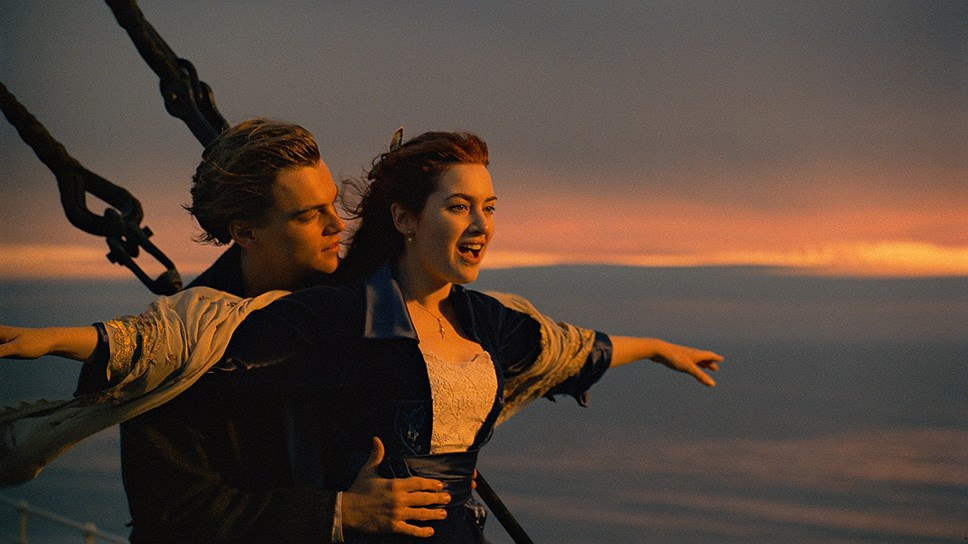


Информация о файлах:
 - *titanic_data.csv* содержит различную информацию о пассажирах Титаника (билет, класс, возраст и т.п.)
 - *titanic_surv.csv* содержит для каждого пассажира из первого файла информацию о том, выжил ли этот пассажир (метка 1) или нет (метка 0)




## Полезные функции библиотеки Pandas

Документация библиотеки Pandas: https://pandas.pydata.org/docs/

Здесь в поиске можно искать названия функций/методов и открывать подробную информацию по ним.

### Чтение из файла
Обычно данные хранятся в виде таблиц в файлах формата .csv или .xlsx. На этом семинаре мы будем загружать данные из .csv файлов.



Загрузим первый файл. Ссылка на его скачивание: https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1

In [3]:
titanic_passengers = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [4]:
titanic_passengers.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Информация о столбцах:

- **PassengerId**: уникальный id пассажира
- **Pclass**: класс каюты, в которой ехал пассажир (1, 2 или 3)
- **Name**: имя пассажира
- **Sex**: пол пассажира
- **Age**: возраст пассажира
- **SibSp**: общее количество братьев, сестер и супругов пассажира, которые также ехали на Титанике
- **Parch**: общее количество родителей и детей пассажира, которые также ехали на Титанике
- **Ticket**: номер билета пассажира
- **Fare**: стоимость билета пассажира
- **Cabin**: номер каюты пассажира
- **Embarked**: в каком порту пассажир сел на Титаник:
  - **S**: Southhampton
  - **C**: Cherbourg
  - **Q**: Queenstown

### Получение общей информации о датасете

Выведем shape нашей таблицы: информацию о том, сколько в ней строк и столбцов:

In [6]:
titanic_passengers.shape

(891, 10)

Метод info() выдает информацию:
- сколько в каждой из колонок таблицы пропусков;
- тип каждой колонки.

In [7]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


Метод .describe() для каждой числовой колонки выдает информацию о статистиках:
- **count**: количество не-NaN значений в колонке;
- **mean**: арифметическое среднее значений в колонке;
- **std**: стардартное отклонение значений в колонке;
- **min**: минимальное значение в колонке;
- **25%**: 25-процентная перцентиль значений в колонке;
- **50%**: 50-процентная перцентиль значений в колонке;
- **75%**: 75-процентная перцентиль значений в колонке;
- **max**: максимальное значение в колонке;

In [8]:
titanic_passengers.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Работа с отдельными столбцами.

Чтобы взять отдельный столбец данных, нужно записать его название в квадратных скобках. Далее со столбуом можно работать примерно как с массивом. Например, можно найти минимальное/максимальное значение в столбце:

In [9]:
titanic_passengers['Age'].min()

0.42

In [10]:
titanic_passengers['Age'].max(), titanic_passengers['Age'].mean(), titanic_passengers['Age'].std()

(80.0, 29.69911764705882, 14.526497332334042)

Можно также перевести столбец в тип numpy и работать с ним как с обычным numpy массивом:

In [11]:
age_numpy = np.array(titanic_passengers['Age'])
age_numpy

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

Можно построить [гистограммы](https://ru.wikipedia.org/wiki/Гистограмма) числовых столбцов:

<Axes: >

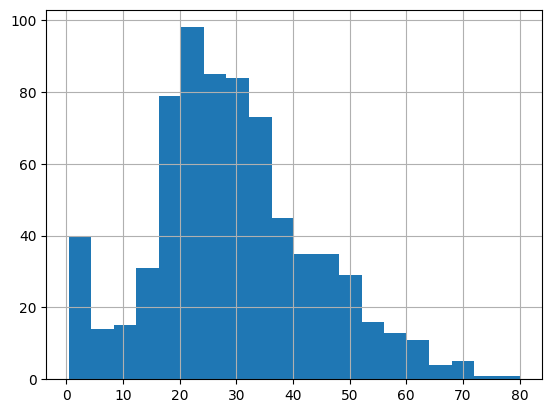

In [19]:
titanic_passengers['Age'].hist(bins=20)

Гистограммы также можно строить с помощью matplotlib:

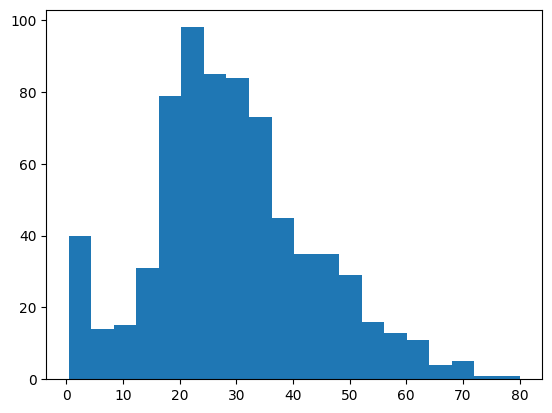

In [20]:
plt.hist(titanic_passengers['Age'], bins=20);

Метод value_counts() выводит все уникальные значения, встречающиеся в колонке, и сколько раз каждое значение встречается в колонке. Эта функция полезна для столбцов, в которых не очень большое количество уникальных значений.

In [21]:
titanic_passengers['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [22]:
titanic_passengers['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Для колонки Age вывод метода value_counts() будет не очень информативным, потому что в колонке Age слишком много уникальных значений. Для таких колонок, в которых много уникальных значений, лучше строить гистограммы, как мы это сделали выше.

In [23]:
titanic_passengers['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

### Индексирование по условиям

Индексирование по условиям — это когда мы хотим выбрать из всей таблицы только те строки, которые соответствуют некоторому условию. Например, мы можем хотеть выделить из датсета только строки, которые соответствуют пассажирам мужского пола (т.е. те строки, у которых в колонке Sex стоит значение male)

Делается это так:

In [24]:
titanic_male = titanic_passengers[ titanic_passengers['Sex'] == 'male' ]

In [25]:
titanic_male.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Убедимся, что в titanic_male только пассажиры мужского пола:

In [26]:
titanic_male['Sex'].value_counts()

Sex
male    577
Name: count, dtype: int64

Также можно использовать условия вида >, <, >=, <=:

In [29]:
titanic_passengers[ titanic_passengers['Age'] >= 18 ]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Можно задавать более сложные условия: комбинацию несколько простых условий. Например, выделим из датасета те строки, которые сооветствуют мужчинам в возрасте от 18 до 22 лет. То есть, мы хотим те строки, у которых:

"в колонке Sex стоит значение male И в колонке Age значение больше 18 И в колонке Age значение меньше 18"

Для этого нужно записать внутри квадратных скобок все три условия, каждый в своих круглых скобках. И между условиями поставить знак & (он означает "И")

In [32]:
titanic_passengers[(titanic_passengers['Age'] > 18) & (titanic_passengers['Age'] < 22) & (titanic_passengers['Sex'] == 'male')]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
13,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
38,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
52,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
68,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
73,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
92,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
103,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
116,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S


Также можно комбинировать условия с помощью ИЛИ. Это знак |

In [33]:
titanic_passengers[(titanic_passengers['Pclass'] == 1) | (titanic_passengers['Pclass'] == 2)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


Можно задавать условие вида "значение в столбце Pclass этой строки лежит в массиве [1, 2]":

In [34]:
titanic_passengers[titanic_passengers['Pclass'].isin([1, 2])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
881,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
884,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


### Модификации датасета, создание новых колонок


Создадим новую колонку, в которую запишем для каждого пассажира общее число его родственников на борту Титаника. Это просто сумма колонок SibSP и Parch:

In [35]:
total_relatives = titanic_passengers['SibSp'] + titanic_passengers['Parch']
total_relatives

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Length: 891, dtype: int64

И добавим эту колонку к таблице. Назовем ее "TotalRelatives":

In [36]:
titanic_passengers['TotalRelatives'] = total_relatives

In [37]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalRelatives
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Отлично, добавлять колонки научились. Но иногда нужно их и удалять. Удалять можно с помощью метода drop():

In [38]:
titanic_passengers = titanic_passengers.drop(columns=['SibSp', 'Parch'])
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


Можно изменять часть значений колонки по некоторому условию. Например,изменим колонку Sex на числовую: вместо ‘male’ напишем 0, вместо ‘female’ — 1.

Вот как можно заменить все значения 'male' на 0 в колонке Sex:


In [45]:
titanic_passengers.loc[ titanic_passengers['Sex']=='male', 'Sex'] = 0

И аналогично заменим все значения 'female' на 1:

In [46]:
titanic_passengers.loc[ titanic_passengers['Sex']=='female', 'Sex'] = 1

In [47]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


### Слияние таблиц
Таблицы можно сливать несколькими способами. Мы рассмотрим слияние по индексу: метод называется ``pd.join``.

Загрузим вторую часть нашей таблицы: titanic_surv.csv. Ссылка на файл: https://www.dropbox.com/s/eejk9byazl7tqi7/titanic_surv.csv?dl=0

In [78]:
titanic_surv = pd.read_csv('titanic_surv.csv', index_col='PassengerId')
titanic_surv.head()

,Survived
PassengerId,
0,0
1,1
2,1
3,1
4,0


Соединим таблицы titakic_passengers и titanic_surv в одну, используя метод .join(). Слияние происходит по колонке индексов: PassengerId

In [79]:
titanic_passengers = titanic_passengers.join(titanic_surv)

ValueError: columns overlap but no suffix specified: Index(['Survived'], dtype='object')

In [80]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives,Survived
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1.0
3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,0.0
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0.0


### Индексация строк таблицы

Мы умеем получать отдельные столбцы таблицы:

In [81]:
titanic_passengers['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

А вот строку таким же способом получить не выйдет:

In [83]:
titanic_passengers.iloc[1]

Pclass                                                            1
Name              Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                               1
Age                                                            38.0
Ticket                                                     PC 17599
Fare                                                        71.2833
Cabin                                                           C85
Embarked                                                          C
TotalRelatives                                                    1
Survived                                                        1.0
Name: 2, dtype: object

Чтобы получить первую по счету строку (нумерация строк идет сверху вниз и начинается с нуля), нужно написать .iloc[1]:

In [84]:
titanic_passengers.iloc[1]

Pclass                                                            1
Name              Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                               1
Age                                                            38.0
Ticket                                                     PC 17599
Fare                                                        71.2833
Cabin                                                           C85
Embarked                                                          C
TotalRelatives                                                    1
Survived                                                        1.0
Name: 2, dtype: object

Далее у полученной строки можно брать значения разных столбцов:

In [85]:
titanic_passengers.iloc[1]['Name']

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

Чтобы сразу получать значение по строке и столбцу, можно использовать метод .loc.

Внимание: метод loc берет номер строки из колонки индексов (PassengerId в нашем случае). Поэтому индекс 1 будет соответствовать самой верхней строке таблицы.

In [89]:
titanic_passengers.loc[1, 'Name']

'Braund, Mr. Owen Harris'

Значения в ячейках можно изменять:

In [90]:
titanic_passengers.loc[1, 'Name'] = 'Petya'

In [91]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalRelatives,Survived
PassengerId,,,,,,,,,,
1,3,Petya,0,22.0,A/5 21171,7.2500,NaN,S,1,1.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1.0
3,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,0.0
5,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0.0


### Pandas и циклы

Никогда не стоит делать циклы по элементам Pandas-таблиц. Это работает очень долго. Давайте в этом убедимся:

Попробуем сделать цикл по строкам таблицы и проверить, сколько времени это займет.

Давайте сделаем цикл для подсчета количества людей в таблице, которые старше 20 лет.

In [92]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic_passengers)):
  if titanic_passengers.iloc[i]['Age'] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

Seconds: 0.04280352592468262


А теперь посчитаем то же самое (количество людей, старше 20 лет), с помощью индексирования по условию:

In [93]:
import time

start_time = time.time()

num_people_older_20 = len(titanic_passengers[titanic_passengers['Age']>20])

end_time = time.time()
print('Seconds:', end_time-start_time)

Seconds: 0.001123189926147461


Насколько быстрее это работает!

Вместо цикла при работе с Pandas-таблицей лучше использовать методы Pandas. Практически любую задачу можно решить без цикла, а используя встроенные методы Pandas.

Но если все же очень хочется сделать цикл, то лучше перед этим перевести таблицу в numpy-массив:

In [94]:
titanic_passengers_np = np.array(titanic_passengers)

In [95]:
titanic_passengers_np

array([[3, 'Petya', 0, ..., 'S', 1, 1.0],
       [1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 1, ...,
        'C', 1, 1.0],
       [3, 'Heikkinen, Miss. Laina', 1, ..., 'S', 0, 1.0],
       ...,
       [3, 'Johnston, Miss. Catherine Helen "Carrie"', 1, ..., 'S', 3,
        1.0],
       [1, 'Behr, Mr. Karl Howell', 0, ..., 'C', 0, 0.0],
       [3, 'Dooley, Mr. Patrick', 0, ..., 'Q', 0, nan]], dtype=object)

In [96]:
titanic_passengers_np[0]

array([3, 'Petya', 0, 22.0, 'A/5 21171', 7.25, nan, 'S', 1, 1.0],
      dtype=object)

Напишем тот же цикл, только с titanic_passengers_np вместо titanic_passengers:

In [97]:
import time

start_time = time.time()

num_people_older_20 = 0
for i in range(len(titanic_passengers_np)):
  if titanic_passengers_np[i][3] > 20:
    num_people_older_20 += 1

end_time = time.time()
print('Seconds:', end_time-start_time)

Seconds: 0.0


Насколько быстрее это работает!

## Визуализация данных

Импортируем библиотеки. Если вы импортировали библиотеки выше, то второй раз делать это не нужно.

In [98]:
import numpy as np
import pandas as pd

Загрузим данные и сольем две таблицы в одну:

In [126]:
titanic_passengers = pd.read_csv('titanic_data.csv', index_col='PassengerId')

titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
titanic_surv = pd.read_csv('titanic_surv.csv')
titanic_surv['PassengerId'] += 1
titanic_surv.set_index('PassengerId', inplace=True)
titanic_surv.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [128]:

titanic_passengers = titanic_passengers.join(titanic_surv)
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Переведем колонку Sex в числовой вид: male заменим на 1, female на 0:

In [129]:
sex = titanic_passengers['Sex']

sex = (sex == 'male').astype(int)
titanic_passengers['Sex'] = sex

titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


Переведем колонку Embarked в числовой вид:

In [130]:
titanic_passengers['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [131]:
embarked = titanic_passengers['Embarked']

embarked_dict = {
    'S': 0,
    'C': 1,
    'Q': 2
}

embarked = embarked.map(embarked_dict)
titanic_passengers['Embarked'] = embarked
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,1
3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,1
5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,0


### Matplotlib Scatter

In [132]:
import matplotlib.pyplot as plt

Функция Scatter позволяет визуализировать точки на декартовой плоскости по их координатам.

Документация scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Text(0, 0.5, 'Fare')

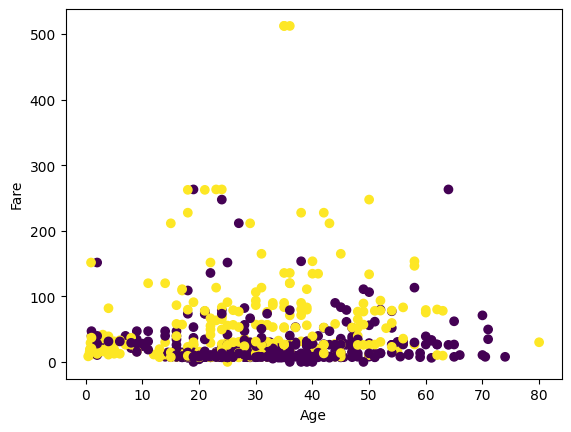

In [134]:
plt.scatter(titanic_passengers['Age'], titanic_passengers['Fare'], c=titanic_passengers['Survived'])

plt.xlabel('Age')
plt.ylabel('Fare')

### Seaborn
Ещё одна полезная библиотека для визуализации данных --- Seaborn.

In [136]:
import seaborn as sns

#### Pairplot

Функция Pairplot позволяет получать такие же визуализации, как мы строили выше с помощью Scatter, для всех пар числовых колонок сразу.

Документация pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html

C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

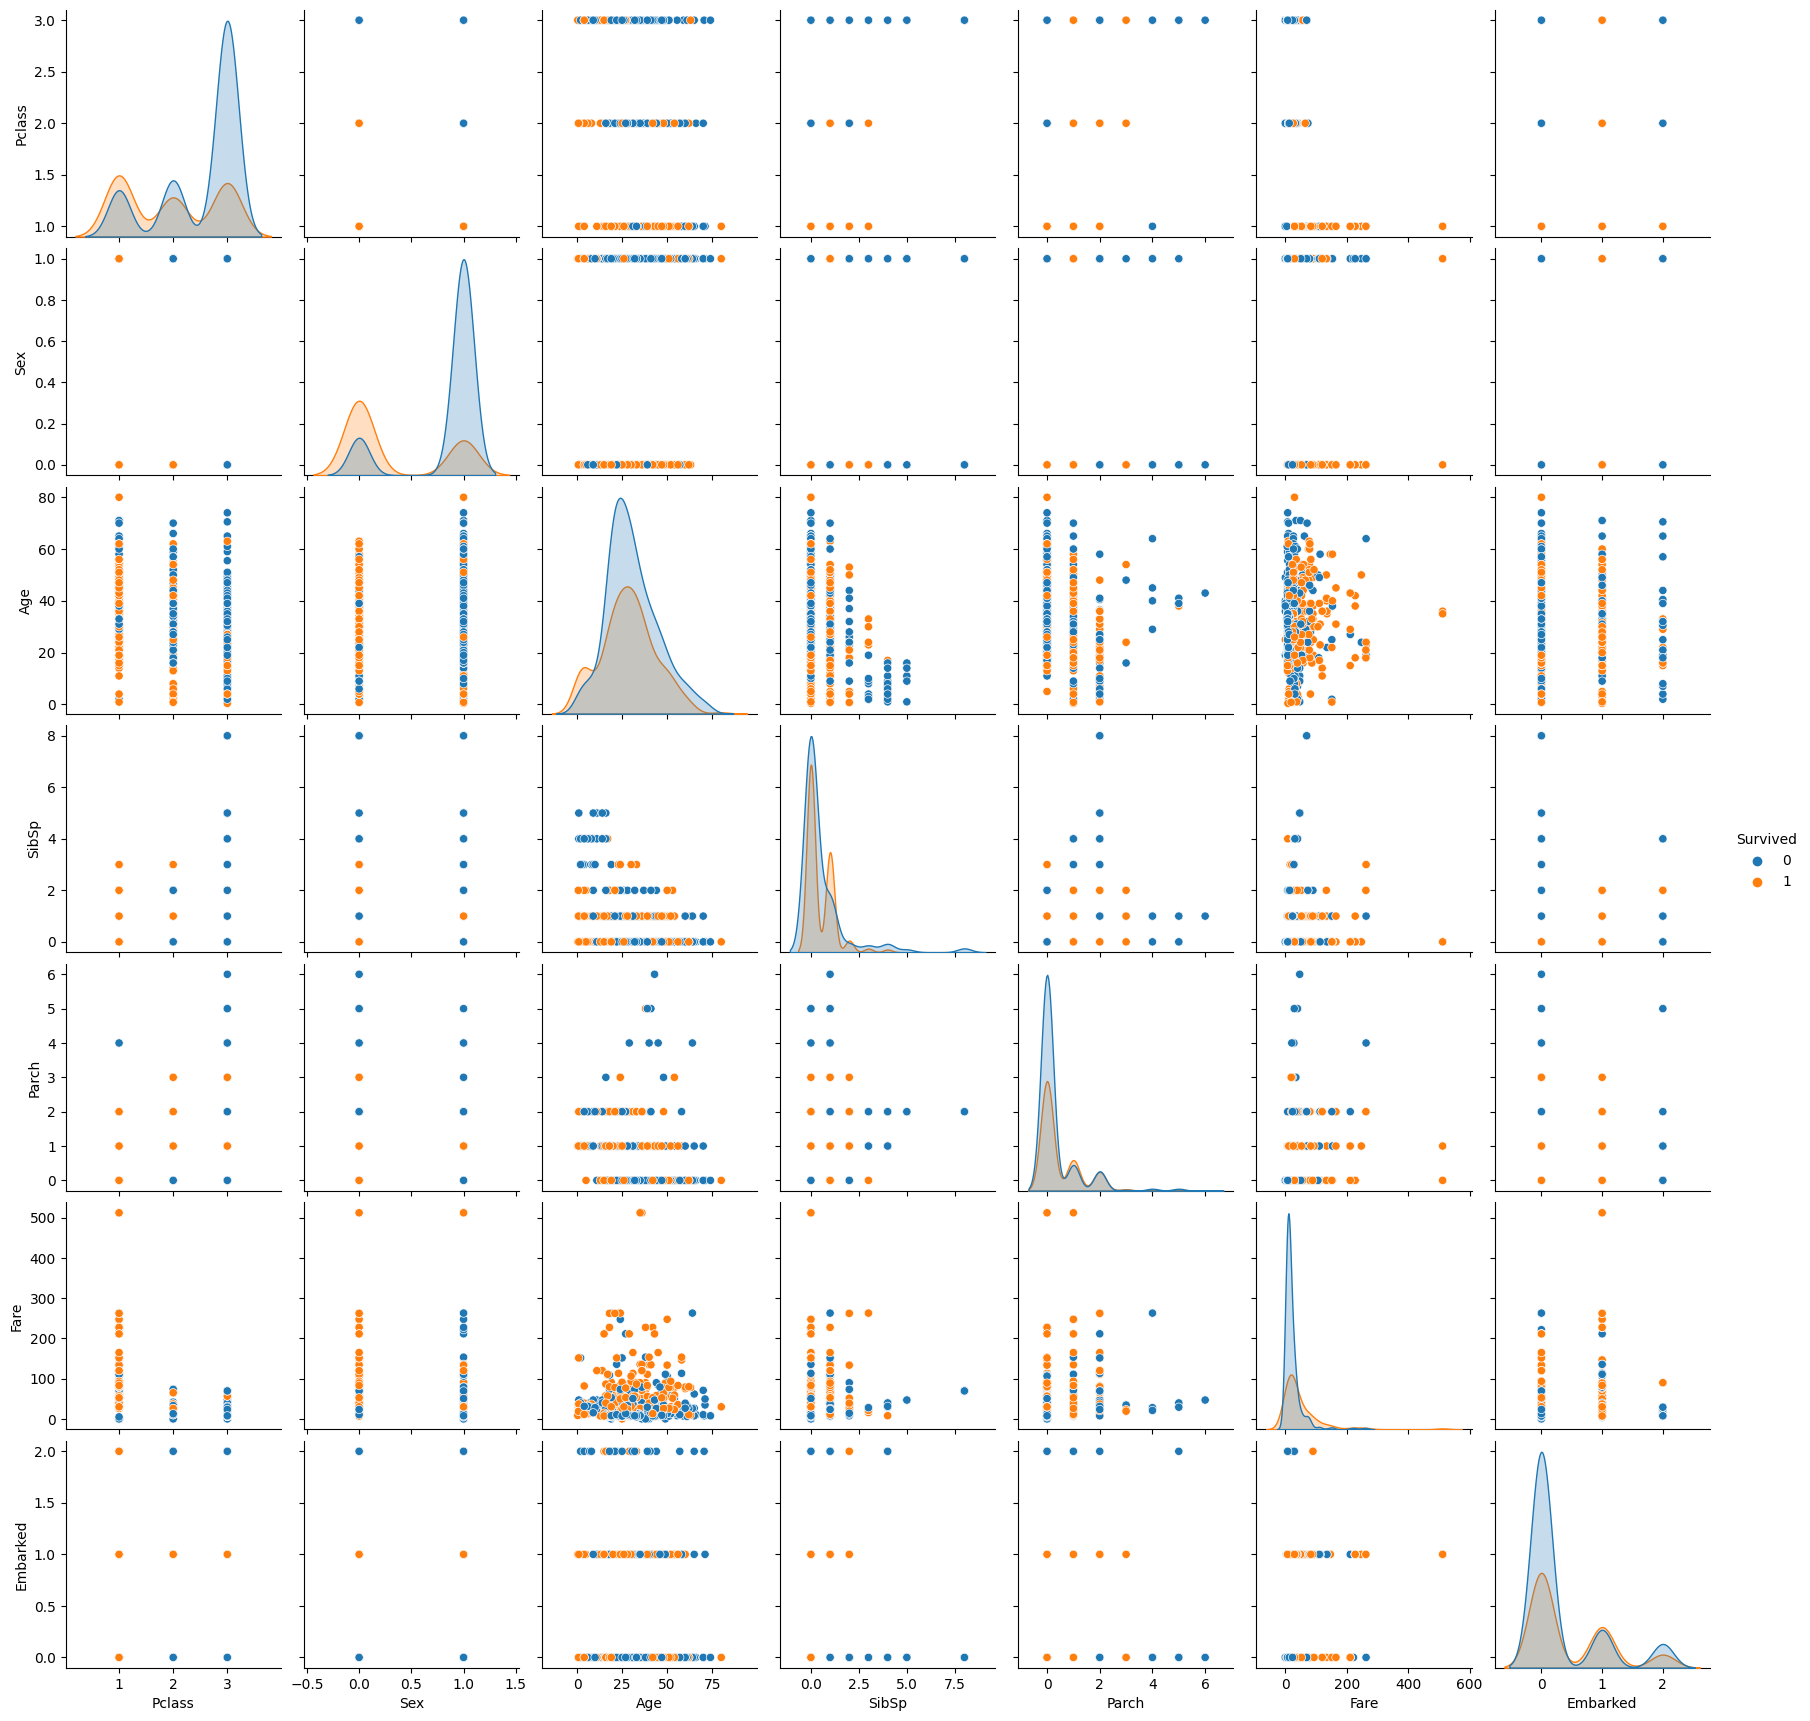

In [137]:
sns.pairplot(titanic_passengers, hue="Survived")

#### Матрица корреляций

В Pandas можно легко получить матрицу коэффициентов корреляций всех числовых признаков между собой:

In [140]:
titanic_passengers.corr(numeric_only=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835,-0.338481
Sex,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593,-0.543351
Age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186,-0.077221
SibSp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606,-0.035322
Parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320,0.081629
Fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462,0.257307
Embarked,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000,0.108669
Survived,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669,1.000000


А с помощью функции heatmap библиотеки Seaborn можно наглядно визуализировать эту матрицу.

Документация heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: >

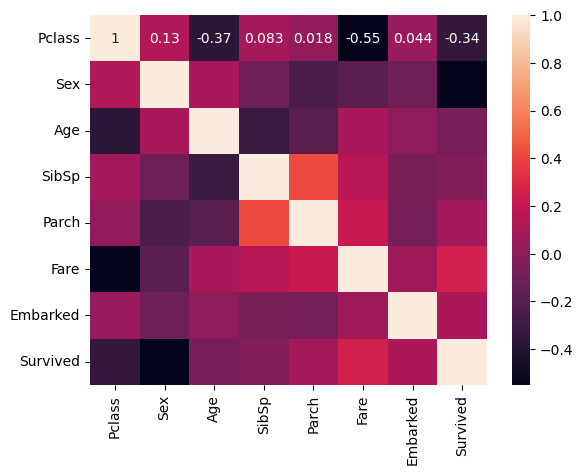

In [141]:
sns.heatmap(titanic_passengers.corr(numeric_only=True), annot=True)

#### Countplot
Ещё одна полезная функция в seaborn называется countplot. Документация countplot: https://seaborn.pydata.org/generated/seaborn.countplot.html

C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

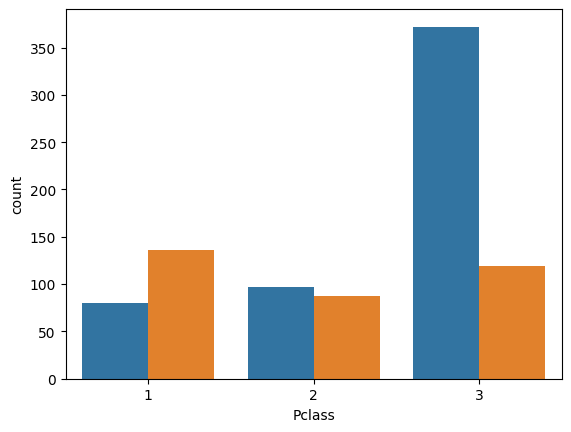

In [147]:
sns.countplot(titanic_passengers, x=titanic_passengers['Pclass'], hue=titanic_passengers["Survived"])

Countplot логично применять к тем колонкам, у которых не очень много уникальных значений. Вот, например, как выглядит визуализация колонки Age с помощью countplot: не очень-то информативно.

C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\masle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

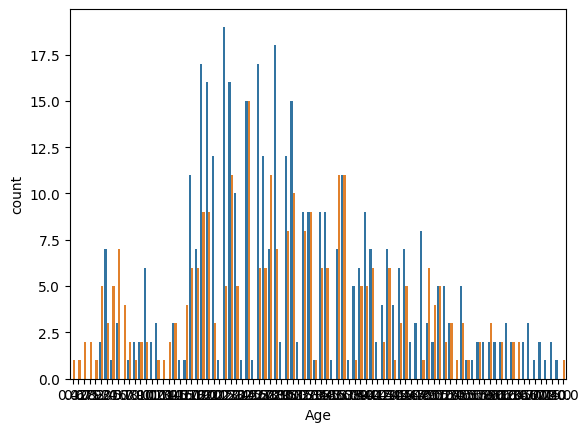

In [149]:
sns.countplot(x=titanic_passengers['Age'], hue=titanic_passengers["Survived"])